# Requirments package

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

from datetime import datetime
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

# Figures
## Plot (line)

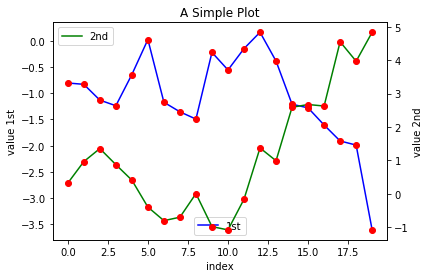

In [15]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1000)

y = np.random.standard_normal((20, 2)).cumsum(axis=0)
x = np.arange(len(y))


fig, ax1 = plt.subplots()
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=8)
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
ax2 = ax1.twinx()
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd')
plt.show()

## Polygon

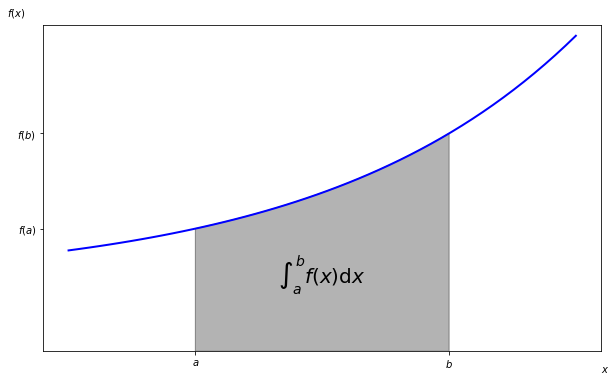

In [17]:
from matplotlib.patches import Polygon

def func(x):
    return 0.5 * np.exp(x) + 1
a, b = 0.5, 1.5
x = np.linspace(0, 2)
y = func(x)
Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 1, r'$\int_a^b f(x)\mathrm{d}x$',
      horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'))
plt.show()

In [2]:
start = "2020-01-01"  # start date
end = datetime.today().strftime('%Y-%m-%d')  # now
"""
{
    Nasdaq: ^IXIC,
    PHLX Semiconductor: ^SOX,
    S&P 500: ^GSPC,
    Dow Jones: ^DJI,
    HANG SENG: ^HSI,
    SHA 000001: 000001.SS,
    NIKKEI: ^N225,
    GERMAN DAX: ^GDAXI,
    TAIPEI: ^TWII,
    KOREA: ^KS11
}
"""
# markets = ("^IXIC", "^SOX", "HSI", "^GSPC", "^DJI", "^N225", "000001.SS", "^GDAXI", "^TWII", "^KS11")
markets = ("^IXIC", "^SOX", "^TWII")
allData = []
for market in markets:
    data = web.get_data_yahoo(market, start=start, end=end)    
    data.rename(columns={"Open": "Open" + market,
                       "High": "High" + market,
                       "Low": "Low" + market,
                       "Close": "Close" + market,
                       "Adj Close": "AClose" + market,
                       "Volume": "Volume" + market}, inplace=True)
    allData.append(data)
markets = pd.concat(allData, axis=1)
markets.reset_index(inplace=True)
markets.set_index("Date", inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
col = ['Open^TWII', 'High^TWII', 'Low^TWII', 'Close^TWII', "Volume^TWII"]
TWII = markets[col]
TWII.dropna(inplace=True)
TWII.rename(mapper=lambda s: s.rstrip("^TWII"), axis=1, inplace=True)
TWII

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,12026.500000,12110.740234,12026.230469,12100.480469,2023800.0
2020-01-03,12167.440430,12197.639648,12023.599609,12110.429688,2572900.0
2020-01-06,12035.709961,12040.080078,11953.360352,11953.360352,2345200.0
2020-01-07,11961.969727,11986.030273,11822.400391,11880.320312,2338400.0
2020-01-08,11818.759766,11899.669922,11777.450195,11817.099609,2428800.0
...,...,...,...,...,...
2020-05-27,11023.929688,11069.719727,10972.250000,11014.660156,2794500.0
2020-05-28,11040.620117,11087.530273,10915.299805,10944.190430,3122300.0
2020-05-29,10921.160156,10965.030273,10861.900391,10942.160156,3589800.0


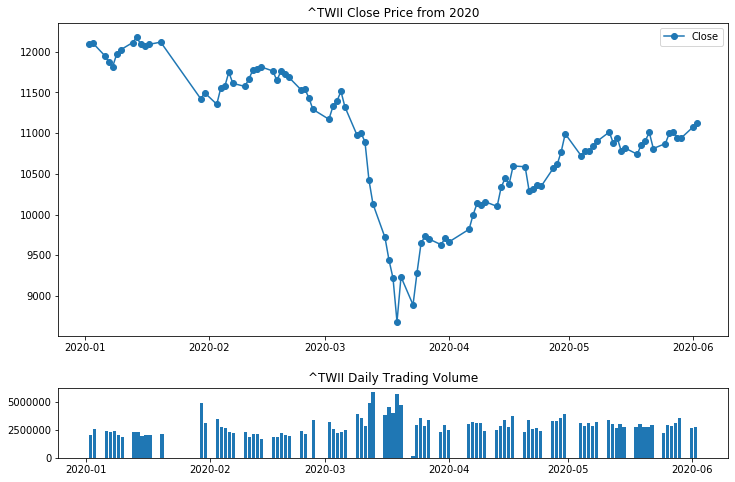

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(TWII.index, TWII["Close"], "o-", label='Close')
plt.title('^TWII Close Price from 2020')
plt.legend()

bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(TWII.index, TWII["Volume"])
plt.title('^TWII Daily Trading Volume')


plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)
top.set
plt.show()


## Candlestick chart (K線圖)

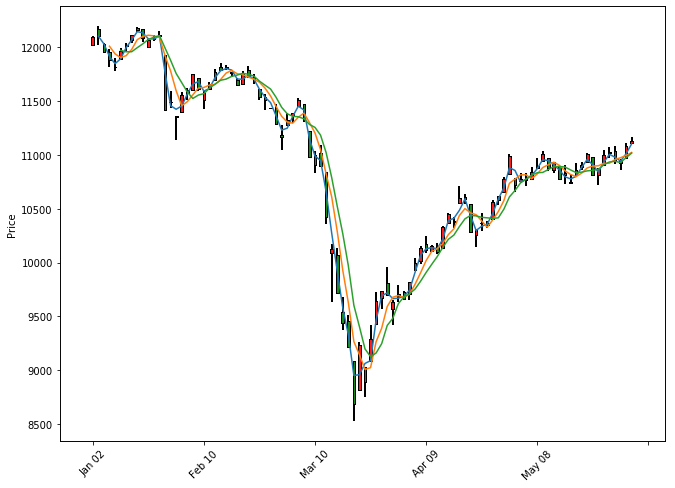

In [5]:
import mplfinance as mpf

mc = mpf.make_marketcolors(up='r',down='g')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(TWII,type='candle',style=s, figscale=1.5, mav=(2,4,6))
plt.show()

## Ploty (Interactive chart)

In [12]:
plyo.iplot(TWII.drop("Volume", axis=1).iplot(asFigure=True))

In [18]:
qf = cf.QuantFig(
                  TWII, 
                  title='TWII',
                  legend='top',
                  name='TWII'
         )

plyo.iplot(
             qf.iplot(asFigure=True),
#              image='png',
#              filename='qf_01'
         )

## Bollinger bands

In [19]:
qf.add_bollinger_bands(periods=14,  boll_std=2)
plyo.iplot(qf.iplot(asFigure=True),)

## Relative strength indicator

In [20]:
qf.add_rsi(periods=14, showbands=False)
plyo.iplot(qf.iplot(asFigure=True))

In [21]:
qf.add_adx()
plyo.iplot(qf.iplot(asFigure=True))

In [22]:
qf.add_macd()
plyo.iplot(qf.iplot(asFigure=True))